In [43]:
import numpy as np
import random
import math
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
class SlotArm():
  def __init__(self, percentage):
    self.percentage = percentage # 코인이 나올 확률

  def draw(self):
    if self.percentage > random.random():
      return 1.0
    else:
      return 0.0



In [45]:
class EpsilonGreedy():
  def __init__(self, epsilon):
    self.epsilon = epsilon #탐색하는 확률


  def initialize(self, n_arms):
    self.tries = np.zeros(n_arms)
    self.values = np.zeros(n_arms)

  def select_arm(self):
    if self.epsilon > random.random():
      return np.random.randint(0, len(self.values))
    else:
      return np.argmax(self.values)
      
  def update(self, chosen_arm, reward, t):
    self.tries[chosen_arm] += 1

    tries = self.tries[chosen_arm]
    values = self.values[chosen_arm]
    self.values[chosen_arm] = ((tries-1) / float(tries)) * values + (1 / float(tries)) * reward

  def label(self):
    return 'e-greedy(' + str(self.epsilon) + ")"

In [46]:
class UCB1():
  def initialize(self, n_arms):
    self.tries = np.zeros(n_arms)
    self.wins = np.zeros(n_arms)
    self.values = np.zeros(n_arms)

  def select_arm(self):
    for i in range(len(self.tries)):
      if self.tries[i] == 0:
        return i
    return np.argmax(self.values)

  def update(self, chosen_arm, reward, t):
    self.tries[chosen_arm] += 1

    if reward == 1.0:
      self.wins[chosen_arm] += 1

    for i in range(len(self.tries)):
      if self.tries[i] == 0:
        return

    for i in range(len(self.values)):
      self.values[i] = self.wins[i] / self.tries[i] + (2 * math.log(t) / self.tries[i]) ** 0.5


  def label(self):
    return 'ucb1'

In [47]:
def play(algo, arms, num_sims, num_time):
  times = np.zeros(num_sims * num_time)
  rewards = np.zeros(num_sims * num_time)

  for sim in range(num_sims):
    algo.initialize(len(arms))
    for time in range(num_time):
      index = sim * num_time + time

      times[index] = time + 1
      chosen_arm = algo.select_arm()
      reward = arms[chosen_arm].draw()
      rewards[index] = reward
      algo.update(chosen_arm, reward, time + 1)

  return [times, rewards]

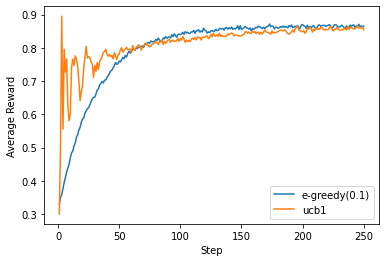

In [48]:
arms = (SlotArm(0.3), SlotArm(0.5), SlotArm(0.9))

algos = (EpsilonGreedy(0.1), UCB1())

for algo in algos:
  results = play(algo, arms, 10000, 250)

  df = pd.DataFrame({'times': results[0], 'rewards': results[1]})
  mean = df['rewards'].groupby(df['times']).mean()
  plt.plot(mean, label = algo.label())

plt.xlabel('Step')
plt.ylabel('Average Reward')
plt.legend(loc = 'best')
plt.show()